In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the cleaned file
FILE = "brain_stroke_clean.csv"
df = pd.read_csv(FILE)

In [2]:
# show summary for all dtypes
print(df.describe(include='all'))

             gender          age  hypertension  heart_disease  ever_married  \
count   4981.000000  4981.000000   4981.000000    4981.000000   4981.000000   
unique          NaN          NaN           NaN            NaN           NaN   
top             NaN          NaN           NaN            NaN           NaN   
freq            NaN          NaN           NaN            NaN           NaN   
mean       0.416382    43.430436      0.096165       0.055210      0.658502   
std        0.493008    22.643098      0.294848       0.228412      0.474260   
min        0.000000     1.000000      0.000000       0.000000      0.000000   
25%        0.000000    25.000000      0.000000       0.000000      0.000000   
50%        0.000000    45.000000      0.000000       0.000000      1.000000   
75%        1.000000    61.000000      0.000000       0.000000      1.000000   
max        1.000000    82.000000      1.000000       1.000000      1.000000   

       work_type  Residence_type  avg_glucose_level

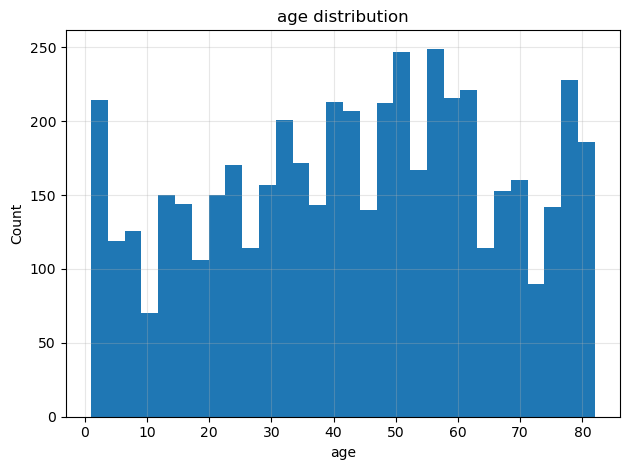

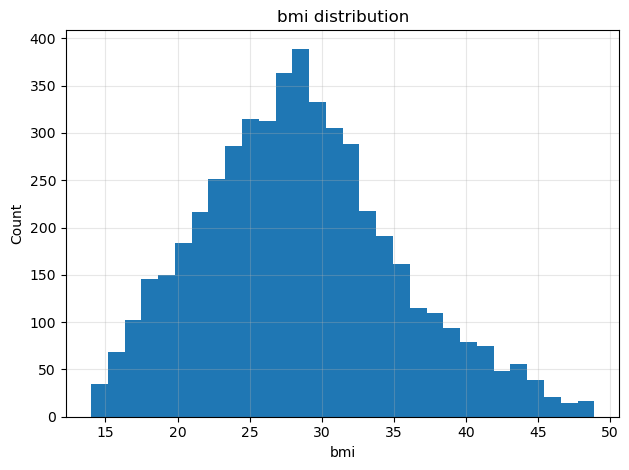

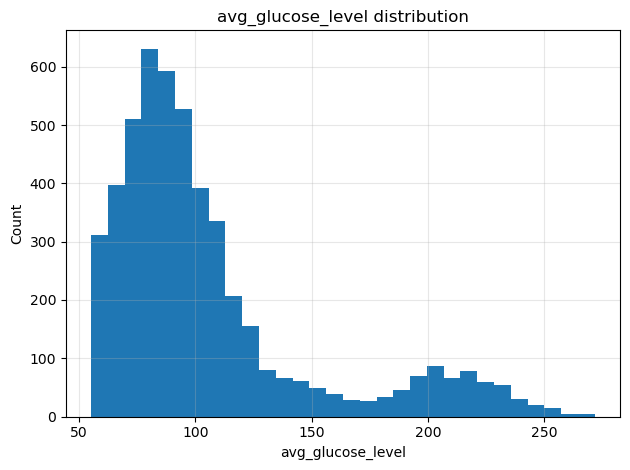

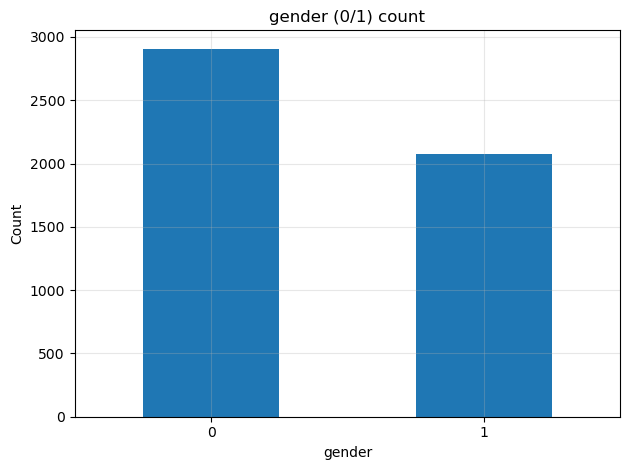

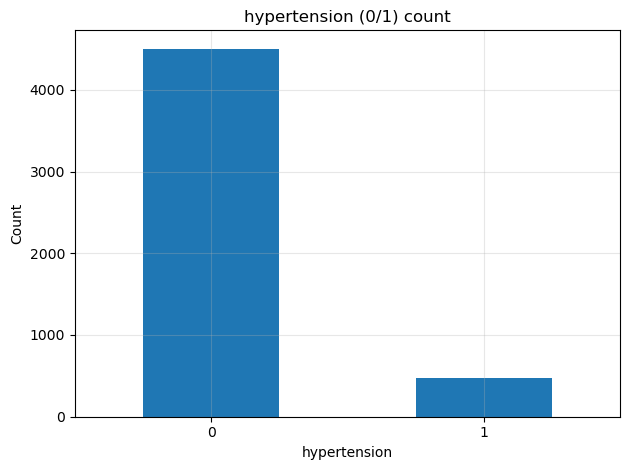

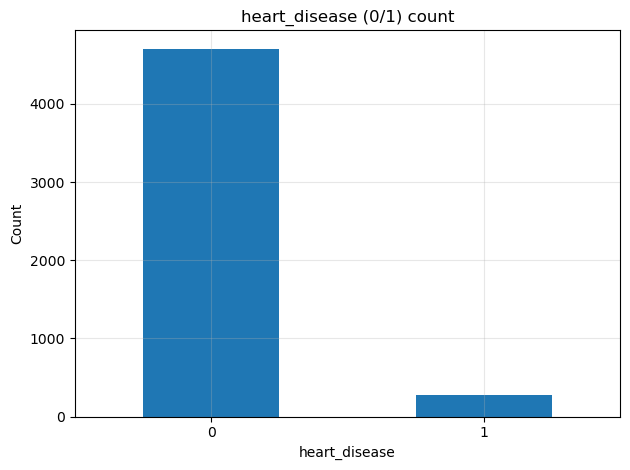

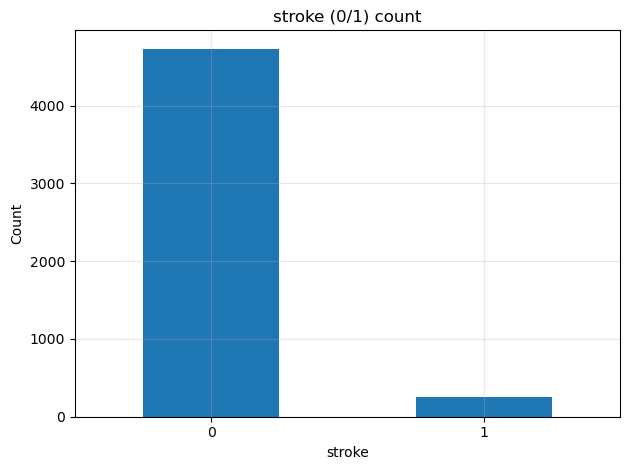

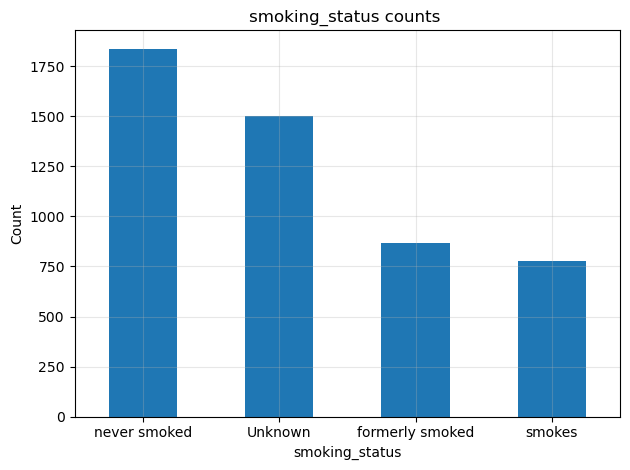

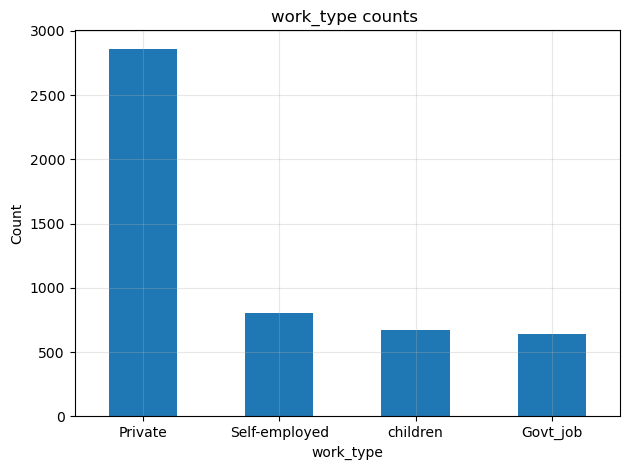

In [3]:

# Read your cleaned file
df = pd.read_csv("brain_stroke_clean.csv")  # change path if needed

# show datadistribution for numeric data
num_cols = ["age", "bmi", "avg_glucose_level"]
for c in num_cols:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(f"{c} distribution")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# show datadistribution for binary data
bin_cols = ["gender","hypertension", "heart_disease", "stroke"] 
for c in bin_cols:
    plt.figure()
    df[c].value_counts().sort_index().plot(kind="bar",rot = 0)
    plt.title(f"{c} (0/1) count")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
   

# show datadistribution for categorical data
cat_cols = ["smoking_status", "work_type"]
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols)

for c in cat_cols:
    cols = [col for col in dummies.columns if col.startswith(c + "_")]
    counts = dummies[cols].sum().sort_values(ascending=False)
    # pretty labels: remove "c_"
    counts.index = [name.split(c + "_", 1)[1] for name in counts.index]

    plt.figure()
    counts.plot(kind="bar", rot=0)
    plt.title(f"{c} counts ")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()




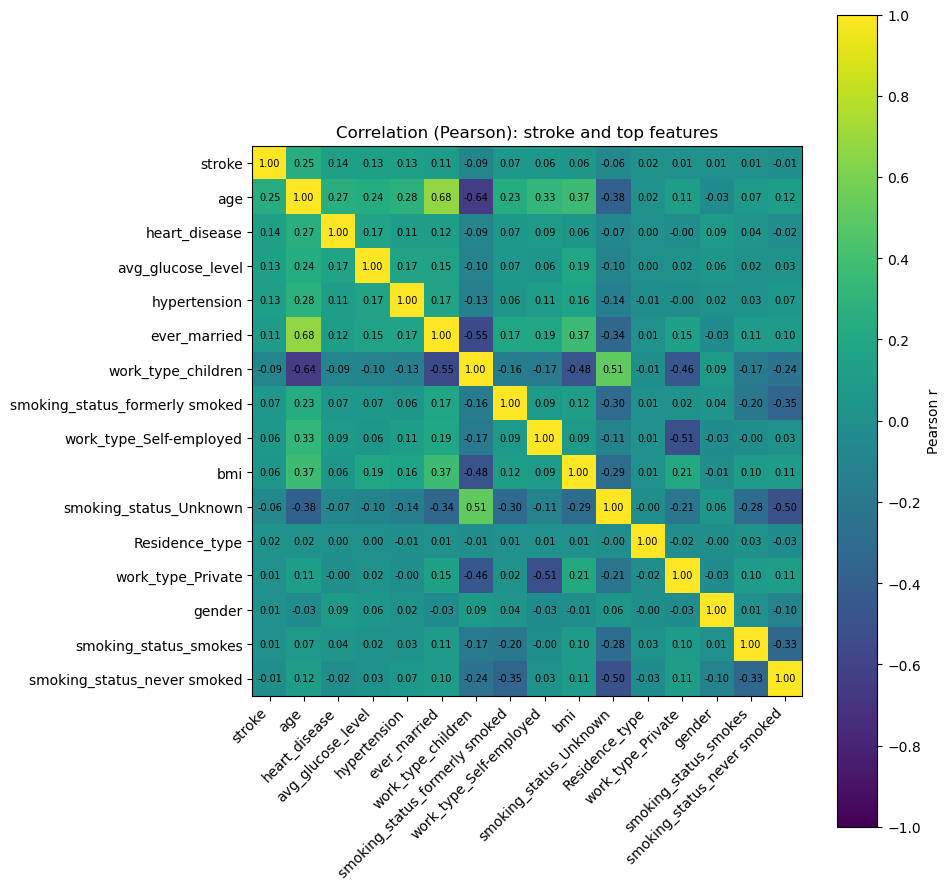

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("brain_stroke_clean.csv")

# ensure target numeric
df["stroke"] = pd.to_numeric(df["stroke"], errors="coerce")

# one-hot only multi-class text columns that exist
cat_cols = [c for c in ["smoking_status", "work_type", "gender"] if c in df.columns and df[c].dtype == "object"]
D_cat = pd.get_dummies(df[cat_cols], drop_first=False) if cat_cols else pd.DataFrame(index=df.index)

# numeric/binary features (keep existing 0/1 columns, exclude target)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "stroke"]
D_num = df[num_cols]

# combine + target
DATA = pd.concat([D_num, D_cat, df["stroke"]], axis=1)

# correlations to stroke, pick top-k
corr_full = DATA.corr(method="pearson")
abs_to_y = corr_full["stroke"].drop(labels=["stroke"]).abs().sort_values(ascending=False)

# only pick top 15
topK = 15
top_feats = abs_to_y.head(topK).index.tolist()
cols = ["stroke"] + top_feats
M = DATA[cols].corr(method="pearson").round(3)

# visualize
labels = M.columns.tolist()
C = M.values
fig, ax = plt.subplots(figsize=(0.6*len(labels), 0.6*len(labels)))
im = ax.imshow(C, vmin=-1, vmax=1)
ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels))); ax.set_yticklabels(labels)
ax.set_title("Correlation (Pearson): stroke and top features")

for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f"{C[i,j]:.2f}", ha="center", va="center", fontsize=7, color="black")

cb = fig.colorbar(im, ax=ax, ticks=np.arange(-1, 1.01, 0.2)); cb.set_label("Pearson r")
plt.tight_layout(); plt.show()
